In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Input, Model
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D,Dropout, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv('')#input your path to your file
df.drop(['Patient ID'], axis = 1, inplace= True)
le = LabelEncoder()
changedColumns = ['Sex','Diet','Country','Continent','Hemisphere','Physical Activity Days Per Week']#add blood pressure when a solution is found
for i,column in enumerate(changedColumns):
    df[column] = le.fit_transform(df[column])

df_bp = df['Blood Pressure'].str.split('/')
sys_bp = []
dia_bp = []
for bp in df_bp.to_numpy():
  sys_bp.append(int(bp[0]))
  dia_bp.append(int(bp[1]))

df['Systolic Blood Pressure'] = sys_bp
df['Diastolic Blood Pressure'] = dia_bp
df.drop('Blood Pressure',axis = 1, inplace = True)
df_cluster = df.drop(['Heart Attack Risk'],axis = 1)
df_cluster['Blood pressure diff'] = df_cluster['Systolic Blood Pressure'] - df_cluster['Diastolic Blood Pressure']
scaler = MinMaxScaler()
columns = df_cluster.columns
df_cluster = scaler.fit_transform(df_cluster)
# df_cluster_scaled = pd.DataFrame(df_cluster, columns=df)
df_cluster_scaled = pd.DataFrame(df_cluster, columns=columns)
df_cluster_scaled['Heart Attack Risk'] = df['Heart Attack Risk']

Age
Sex
Cholesterol
Heart Rate
Diabetes
Family History
Smoking
Obesity
Alcohol Consumption
Exercise Hours Per Week
Diet
Previous Heart Problems
Medication Use
Stress Level
Sedentary Hours Per Day
Income
BMI
Triglycerides
Physical Activity Days Per Week
Sleep Hours Per Day
Country
Continent
Hemisphere
Systolic Blood Pressure
Diastolic Blood Pressure
Heart Attack Risk


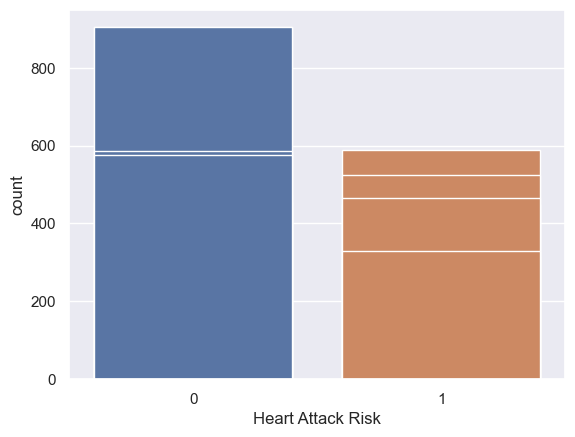

In [24]:
sns.set_theme(style="darkgrid")
columns = df_cluster_scaled.columns

columns = ['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Systolic Blood Pressure', 'Diastolic Blood Pressure',
       'Heart Attack Risk']
for col in columns:
    print(col)
    sns.countplot(x=col, data=cluster_1)
    plt.show
    # plt.hist(col)
    # sns.displot(
    #         cluster_1, x= col,
    #         binwidth=2, height=3, facet_kws=dict(margin_titles=True),
    #     )
# sns.countplot(x='Heart Attack Risk', data=df)
# plt.show()

<Axes: >

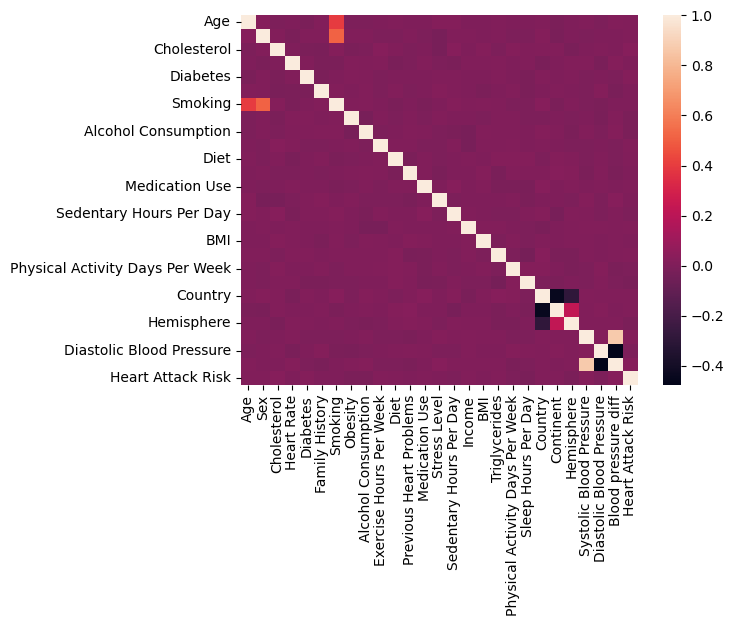

In [4]:
corr = df_cluster_scaled.corr()
sns.heatmap(corr) #this is a correlation heatmap. if it is larger than 0.8 or less than -0.8, the two parameters are highly correlated, positive or negative. if is between 0.8 and 0.4, moderate corrlation. If less than 0.4 postive or negative, then it is not correlated

In [24]:

diff_from_centroid_run1 = []
n_trials = 10
for i in range(2,n_trials,1):
  # m = k_means(df_cluster_scaled, n_init = 100,n_clusters = i)
  m = k_means(df_cluster,n_clusters=i )
  diff_from_centroid_run1.append(m[-1])
print(diff_from_centroid_run1)

/Users/Parith/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Parith/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Parith/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Parith/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

[28857.742123598415, 27453.344663541255, 26596.734468110353, 25721.165350949406, 25208.662469824416, 24677.709736987745, 24244.286471899075, 23958.48111542014]


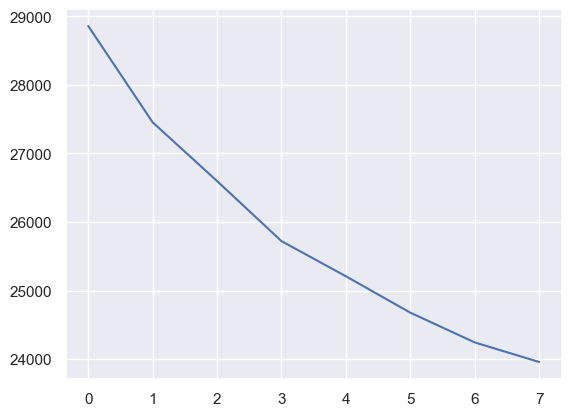

In [25]:
plt.plot(diff_from_centroid_run1)

In [4]:

best_model = k_means(df_cluster,n_clusters = 7,random_state=69)
print(best_model)

/Users/Parith/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([[ 1.52332227e-01,  5.55111512e-16,  4.85647124e-01,
         5.10982933e-01,  6.51548673e-01,  4.75663717e-01,
        -1.44328993e-15,  4.95575221e-01,  5.79646018e-01,
         5.00813344e-01,  5.14380531e-01,  4.96681416e-01,
         5.14380531e-01,  4.98279253e-01,  4.86408119e-01,
         4.91137957e-01,  4.88577847e-01,  4.99492874e-01,
         4.41648230e-01,  5.09218289e-01,  4.74848626e-01,
         4.98672566e-01,  3.50663717e-01,  5.09070796e-01,
         5.13761062e-01,  5.00916561e-01],
       [ 5.44108163e-01,  7.70315091e-01,  5.04320659e-01,
         4.89054726e-01,  6.43449420e-01,  5.02487562e-01,
         1.00000000e+00,  4.44089210e-16,  6.21890547e-01,
         5.09996013e-01,  4.95439469e-01,  1.00000000e+00,
         4.95024876e-01,  4.93366501e-01,  5.05008650e-01,
         4.94554107e-01,  5.14375587e-01,  4.90511727e-01,
         4.42889718e-01,  4.99585406e-01,  5.64720258e-01,
         4.37479270e-01,  1.66533454e-16,  4.95559241e-01,
         5.1

In [10]:
cluster_1= df_cluster_scaled.iloc[np.where(best_model[1] == 0)]
cluster_2 = df_cluster_scaled.iloc[np.where(best_model[1]==1)]
cluster_3= df_cluster_scaled.iloc[np.where(best_model[1] == 2)]
cluster_4 = df_cluster_scaled.iloc[np.where(best_model[1]==3)]
cluster_5 = df_cluster_scaled.iloc[np.where(best_model[1]==4)]
cluster_6 = df_cluster_scaled.iloc[np.where(best_model[1]==5)]
cluster_7 = df_cluster_scaled.iloc[np.where(best_model[1]==6)]




In [6]:
cluster_1= df.iloc[np.where(best_model[1] == 0)]
cluster_2 = df.iloc[np.where(best_model[1]==1)]
cluster_3= df.iloc[np.where(best_model[1] == 2)]
cluster_4 = df.iloc[np.where(best_model[1]==3)]
cluster_5 = df.iloc[np.where(best_model[1]==4)]
cluster_6 = df.iloc[np.where(best_model[1]==5)]
cluster_7 = df.iloc[np.where(best_model[1]==6)]

In [6]:
cluster_1.describe()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure
count,904.000000,904.0,904.000000,904.000000,904.000000,904.000000,904.0,904.000000,904.000000,904.000000,...,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,28.967920,0.0,255.981195,75.768805,0.651549,0.475664,0.0,0.495575,0.579646,10.016840,...,28.748545,414.609513,3.533186,7.055310,9.022124,2.493363,0.350664,0.363938,135.816372,85.688053
std,6.604478,0.0,80.842989,20.924022,0.476744,0.499684,0.0,0.500257,0.493889,5.692711,...,6.153228,228.871499,2.345799,1.957815,5.820074,1.599405,0.477442,0.481397,26.585984,14.840609
min,18.000000,0.0,120.000000,40.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.013836,...,18.016191,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000
25%,23.000000,0.0,188.000000,57.000000,0.000000,0.000000,0.0,0.000000,0.000000,5.114021,...,23.455808,218.000000,1.000000,5.000000,4.000000,1.000000,0.000000,0.000000,113.000000,73.000000
50%,29.000000,0.0,250.000000,77.000000,1.000000,0.000000,0.0,0.000000,1.000000,10.004732,...,28.442002,399.000000,4.000000,7.000000,9.000000,3.000000,0.000000,0.000000,136.000000,86.000000
75%,35.000000,0.0,328.000000,95.000000,1.000000,1.000000,0.0,1.000000,1.000000,15.019706,...,34.180273,614.750000,6.000000,9.000000,14.000000,4.000000,1.000000,1.000000,160.000000,99.000000
max,40.000000,0.0,400.000000,110.000000,1.000000,1.000000,0.0,1.000000,1.000000,19.990822,...,39.970515,800.000000,7.000000,10.000000,19.000000,5.000000,1.000000,1.000000,180.000000,110.000000


In [5]:
df_cluster_scaled_describe = df_cluster_scaled.describe()
def percentageMeanSTD(df_ryogi):
    meanData = []
    stdData = []
    
    for i in range(len(df_ryogi.columns)):
        meanData.append((df_cluster_scaled_describe.iloc[1,i]-df_ryogi.iloc[1,i])/df_cluster_scaled_describe.iloc[1,i]*100)
        stdData.append((df_cluster_scaled_describe.iloc[2,i]-df_ryogi.iloc[2,i])/df_cluster_scaled_describe.iloc[2,i]*100)
    print(meanData)
    print(stdData)
        
        



In [8]:
cluster_1_describe = cluster_1.describe()
cluster_2_describe = cluster_2.describe()
cluster_3_describe = cluster_3.describe()
cluster_4_describe = cluster_4.describe()
cluster_5_describe = cluster_5.describe()
cluster_6_describe = cluster_6.describe()
cluster_7_describe = cluster_7.describe()
percentageMeanSTD(cluster_1_describe)
percentageMeanSTD(cluster_2_describe)
percentageMeanSTD(cluster_3_describe)
percentageMeanSTD(cluster_4_describe)
percentageMeanSTD(cluster_5_describe)
percentageMeanSTD(cluster_6_describe)
percentageMeanSTD(cluster_7_describe)


[69.2843970413293, 100.0, 2.7853116906306337, -2.1333162577440423, 0.11334818580974386, 3.512936332350041, 100.0, 1.1669170751749094, 3.082654968568104, -0.02552860521502428, -3.1232347957070337, -0.17075368901290747, -3.217691617136583, -0.3313669909335497, 2.6112610210091733, 0.5322651471318468, 1.3123296491788166, 0.7912611680333013, -1.2237470890374729, -1.0518180922431442, 3.837608638931668, -2.656166583232593, 0.9711198697235492, -1.6432652935578849, -2.114564441617751, -0.29858671827587663, -1.5988900698322754]
[68.91938682553676, 100.0, 0.02508874634797587, -1.8153630360552737, -0.09918165561406293, 0.05908794474134616, 100.0, -0.04613592204335545, -0.7292559540879585, 1.5739696072530254, 0.06623937328180338, -0.05091448872912988, -0.008805151336584435, -0.4024637530873517, -1.6653265878078076, 1.548447913970586, 2.6261919721526463, -2.2897897968253504, -2.748893160620255, 1.5417770819709853, -0.5373993372032037, -0.11540656995807595, 0.17265559442622705, -0.8956640799553179, -

In [60]:
print(meanData)

NameError: name 'meanData' is not defined

In [98]:
#run each model once
rf_1_label = np.array(cluster_1['Heart Attack Risk'])
rf_1 = cluster_1.drop('Heart Attack Risk', axis = 1)
X_train_rf_1, X_test_rf_1, y_train_rf_1, y_test_rf_1 = train_test_split(rf_1, rf_1_label,random_state=63)
X_train_rf_1 = np.array(X_train_rf_1)
X_test_rf_1 = np.array(X_test_rf_1)

rf_2_label = np.array(cluster_2['Heart Attack Risk'])
rf_2 = cluster_2.drop('Heart Attack Risk', axis = 1)
X_train_rf_2, X_test_rf_2, y_train_rf_2, y_test_rf_2 = train_test_split(rf_2, rf_2_label,random_state=64)
X_train_rf_2 = np.array(X_train_rf_2)
X_test_rf_2 = np.array(X_test_rf_2)

rf_3_label = np.array(cluster_3['Heart Attack Risk'])
rf_3 = cluster_3.drop('Heart Attack Risk', axis = 1)
X_train_rf_3, X_test_rf_3, y_train_rf_3, y_test_rf_3 = train_test_split(rf_3, rf_3_label,random_state=65)
X_train_rf_3 = np.array(X_train_rf_3)
X_test_rf_3 = np.array(X_test_rf_3)

rf_4_label = np.array(cluster_4['Heart Attack Risk'])
rf_4 = cluster_4.drop('Heart Attack Risk', axis = 1)
X_train_rf_4, X_test_rf_4, y_train_rf_4, y_test_rf_4 = train_test_split(rf_4, rf_4_label,random_state=66)
X_train_rf_4 = np.array(X_train_rf_4)
X_test_rf_4 = np.array(X_test_rf_4)

rf_5_label = np.array(cluster_5['Heart Attack Risk'])
rf_5 = cluster_5.drop('Heart Attack Risk', axis = 1)
X_train_rf_5, X_test_rf_5, y_train_rf_5, y_test_rf_5 = train_test_split(rf_5, rf_5_label,random_state=67)
X_train_rf_5 = np.array(X_train_rf_5)
X_test_rf_5 = np.array(X_test_rf_5)

rf_6_label = np.array(cluster_6['Heart Attack Risk'])
rf_6 = cluster_6.drop('Heart Attack Risk', axis = 1)
X_train_rf_6, X_test_rf_6, y_train_rf_6, y_test_rf_6 = train_test_split(rf_6, rf_6_label,random_state=68)
X_train_rf_6 = np.array(X_train_rf_6)
X_test_rf_6 = np.array(X_test_rf_6)

rf_7_label = np.array(cluster_7['Heart Attack Risk'])
rf_7 = cluster_7.drop('Heart Attack Risk', axis = 1)
X_train_rf_7, X_test_rf_7, y_train_rf_7, y_test_rf_7 = train_test_split(rf_7, rf_7_label,random_state=69)
X_train_rf_7 = np.array(X_train_rf_7)
X_test_rf_7 = np.array(X_test_rf_7)

rf_label = np.array(df['Heart Attack Risk'])
rf_data = df_cluster_scaled.drop('Heart Attack Risk',axis = 1)
X_train_rf, X_test_rf, y_train_rf, y_test_rf= train_test_split(rf_data, rf_label,random_state=70)
X_train_rf = np.array(X_train_rf)
X_test_rf = np.array(X_test_rf)


RandomForestClassification

In [76]:
rf = RandomForestClassifier()
params = {
    'criterion': ['gini','entropy','log_loss'],#
    'n_estimators' : [100,200,300], #
    'max_depth' : [10,11,12]

}
clf = GridSearchCV(rf,param_grid=params,scoring = 'recall')
clf.fit(X_train_rf , y_train_rf)
best_rf = clf.best_estimator_
df_clf_lol = pd.DataFrame(clf.cv_results_)
df_clf_lol.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.626419,0.016289,0.011621,0.000278,gini,12,100,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.004274,0.002137,0.002137,0.008547,0.004274,0.004274,0.002341,1
3,0.552947,0.005973,0.010592,0.000233,gini,11,100,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...",0.004274,0.004274,0.004274,0.002137,0.004274,0.003846,0.000855,2
8,1.859746,0.025674,0.032911,0.000969,gini,12,300,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.004274,0.002137,0.002137,0.000000,0.000000,0.001709,0.001599,3
24,0.670874,0.019361,0.010963,0.000355,log_loss,12,100,"{'criterion': 'log_loss', 'max_depth': 12, 'n_...",0.002137,0.000000,0.004274,0.002137,0.000000,0.001709,0.001599,3
7,1.252703,0.027096,0.022311,0.000463,gini,12,200,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.004274,0.000000,0.002137,0.002137,0.000000,0.001709,0.001599,3
21,0.605955,0.006407,0.010056,0.000144,log_loss,11,100,"{'criterion': 'log_loss', 'max_depth': 11, 'n_...",0.000000,0.002137,0.002137,0.000000,0.000000,0.000855,0.001047,6
15,0.647174,0.002953,0.010491,0.000173,entropy,12,100,"{'criterion': 'entropy', 'max_depth': 12, 'n_e...",0.002137,0.000000,0.000000,0.000000,0.002137,0.000855,0.001047,6
0,0.518484,0.019726,0.010319,0.000870,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",0.000000,0.000000,0.002137,0.002137,0.000000,0.000855,0.001047,6
16,1.305815,0.007626,0.020441,0.000309,entropy,12,200,"{'criterion': 'entropy', 'max_depth': 12, 'n_e...",0.000000,0.000000,0.000000,0.004274,0.000000,0.000855,0.001709,6
12,0.613640,0.013968,0.010133,0.000282,entropy,11,100,"{'criterion': 'entropy', 'max_depth': 11, 'n_e...",0.002137,0.000000,0.000000,0.000000,0.000000,0.000427,0.000855,10


In [87]:

X_train_rf = pd.DataFrame(X_train_rf)

# Create a DataFrame with feature importances and index

allData_importantFeatures = pd.DataFrame(best_rf.feature_importances_,index = rf_data.columns ,columns=['importance'])


allData_importantFeatures.sort_values('importance', ascending = False, inplace=True)
allData_importantFeatures.to_clipboard()

In [108]:
rf = RandomForestClassifier()
params = {
    'criterion': ['gini','entropy','log_loss'],#
    'n_estimators' : [100,200,300], #
    'max_depth' : [10,11,12]

}
clf = GridSearchCV(rf,param_grid=params,scoring = 'recall')
clf.fit(X_train_rf_1 , y_train_rf_1)
best_rf_1 = clf.best_estimator_
df_clf_lol = pd.DataFrame(clf.cv_results_)
df_clf_lol.sort_values(by = 'rank_test_score', inplace = True)
df_clf_lol.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.079637,0.005991,0.003659,0.000144,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",0.081633,0.040816,0.040816,0.163265,0.102041,0.085714,0.045451,1
16,0.172477,0.001978,0.006527,0.000070,entropy,12,200,"{'criterion': 'entropy', 'max_depth': 12, 'n_e...",0.102041,0.020408,0.040816,0.122449,0.122449,0.081633,0.042809,2
8,0.233764,0.001105,0.009507,0.000108,gini,12,300,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.061224,0.040816,0.163265,0.122449,0.020408,0.081633,0.053218,2
22,0.168000,0.000747,0.006482,0.000200,log_loss,11,200,"{'criterion': 'log_loss', 'max_depth': 11, 'n_...",0.061224,0.061224,0.040816,0.142857,0.061224,0.073469,0.035583,4
6,0.077457,0.000468,0.004185,0.001318,gini,12,100,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.040816,0.040816,0.081633,0.102041,0.102041,0.073469,0.027683,5


In [109]:
importantFeatures = best_rf_1.feature_importances_


cluster_1_importantFeatures = pd.DataFrame(importantFeatures,index = rf_data.columns ,columns=['importance'])

cluster_1_importantFeatures.sort_values('importance', ascending = False, inplace = True)
cluster_1_importantFeatures.to_clipboard()

In [122]:
rf = RandomForestClassifier()
params = {
    'criterion': ['gini','entropy','log_loss'],#
    'n_estimators' : [100,200,300], #
    'max_depth' : [10,11,12]

}
clf = GridSearchCV(rf,param_grid=params,scoring = 'recall')
clf.fit(X_train_rf_2 , y_train_rf_2)
best_rf_2 = clf.best_estimator_
df_clf_lol = pd.DataFrame(clf.cv_results_)
df_clf_lol.sort_values(by = 'rank_test_score', inplace = True)
df_clf_lol.head()



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.092331,0.002756,0.003999,0.000242,gini,11,100,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...",0.044776,0.089552,0.119403,0.074627,0.045455,0.074763,0.028177,1
12,0.100566,0.000473,0.003604,0.000048,entropy,11,100,"{'criterion': 'entropy', 'max_depth': 11, 'n_e...",0.029851,0.089552,0.134328,0.089552,0.030303,0.074717,0.039948,2
6,0.094809,0.006412,0.003881,0.000199,gini,12,100,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.029851,0.089552,0.134328,0.044776,0.060606,0.071823,0.036987,3
8,0.276918,0.001580,0.010091,0.000274,gini,12,300,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.029851,0.149254,0.074627,0.074627,0.030303,0.071732,0.043582,4
19,0.190178,0.001020,0.006490,0.000049,log_loss,10,200,"{'criterion': 'log_loss', 'max_depth': 10, 'n_...",0.014925,0.119403,0.059701,0.089552,0.030303,0.062777,0.038150,5


In [130]:
importantFeatures = best_rf_2.feature_importances_


cluster_1_importantFeatures = pd.DataFrame(importantFeatures,index = rf_data.columns ,columns=['importance'])

cluster_1_importantFeatures.sort_values('importance', ascending = False, inplace = True)
cluster_1_importantFeatures.to_clipboard()

In [127]:

rf = RandomForestClassifier()
params = {
    'criterion': ['gini','entropy','log_loss'],
    'n_estimators' : [100,200,300],
    'max_depth' : [10,11,12]

}
clf = GridSearchCV(rf,param_grid=params,scoring = 'recall')
clf.fit(X_train_rf_3, y_train_rf_3)
df_clf_3 = pd.DataFrame(clf.cv_results_)
df_clf_3.sort_values(by = 'rank_test_score', inplace = True)
df_clf_3.head()
best_rf_3 = clf.best_estimator_


In [129]:
df_clf_3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.116640,0.001374,0.004145,0.000104,entropy,12,100,"{'criterion': 'entropy', 'max_depth': 12, 'n_e...",0.028571,0.043478,0.043478,0.072464,0.085714,0.054741,0.021033,1
6,0.099874,0.000675,0.004050,0.000070,gini,12,100,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.014286,0.057971,0.086957,0.057971,0.042857,0.052008,0.023661,2
12,0.106688,0.000941,0.003810,0.000047,entropy,11,100,"{'criterion': 'entropy', 'max_depth': 11, 'n_e...",0.014286,0.043478,0.072464,0.086957,0.042857,0.052008,0.025374,2
0,0.098252,0.007615,0.003911,0.000187,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",0.014286,0.057971,0.043478,0.072464,0.057143,0.049068,0.019662,4
24,0.114811,0.001562,0.004080,0.000163,log_loss,12,100,"{'criterion': 'log_loss', 'max_depth': 12, 'n_...",0.042857,0.014493,0.043478,0.057971,0.085714,0.048903,0.023183,5


In [131]:
importantFeatures = best_rf_3.feature_importances_


cluster_1_importantFeatures = pd.DataFrame(importantFeatures,index = rf_data.columns ,columns=['importance'])

cluster_1_importantFeatures.sort_values('importance', ascending = False, inplace = True)
cluster_1_importantFeatures.to_clipboard()

In [115]:
importantFeatures = best_rf_3.feature_importances_

# Create a DataFrame with feature importances and index

cluster_3_importantFeatures = pd.DataFrame(importantFeatures,index = rf_data.columns ,columns=['importance'])



cluster_3_importantFeatures.sort_values('importance', ascending = False, inplace = True)
cluster_3_importantFeatures.to_clipboard()

In [124]:
rf = RandomForestClassifier()
params = {
    'criterion': ['gini','entropy','log_loss'],#
    'n_estimators' : [100,200,300], #
    'max_depth' : [10,11,12]

}
clf = GridSearchCV(rf,param_grid=params,scoring = 'recall')
clf.fit(X_train_rf_4 , y_train_rf_4)
best_rf_4 = clf.best_estimator_
df_clf_lol = pd.DataFrame(clf.cv_results_)
df_clf_lol.sort_values(by = 'rank_test_score', ascending = False)
df_clf_lol

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101674,0.007203,0.003947,0.000222,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",0.027027,0.040541,0.013514,0.026667,0.013514,0.024252,0.010094,15
1,0.192876,0.002987,0.007154,0.000271,gini,10,200,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",0.040541,0.054054,0.000000,0.000000,0.054054,0.029730,0.024771,8
2,0.294165,0.001066,0.010552,0.000124,gini,10,300,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",0.027027,0.040541,0.013514,0.013333,0.027027,0.024288,0.010151,13
3,0.100301,0.002187,0.003986,0.000075,gini,11,100,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...",0.040541,0.121622,0.013514,0.013333,0.027027,0.043207,0.040477,1
4,0.194020,0.000675,0.007162,0.000041,gini,11,200,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...",0.027027,0.013514,0.040541,0.026667,0.027027,0.026955,0.008548,9
5,0.293342,0.001047,0.010472,0.000043,gini,11,300,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...",0.013514,0.040541,0.000000,0.013333,0.013514,0.016180,0.013248,19
6,0.100763,0.000400,0.003908,0.000027,gini,12,100,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.027027,0.040541,0.013514,0.053333,0.054054,0.037694,0.015613,5
7,0.200776,0.000995,0.007178,0.000028,gini,12,200,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.040541,0.054054,0.013514,0.053333,0.013514,0.034991,0.018184,6
8,0.307090,0.004932,0.010828,0.000194,gini,12,300,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.054054,0.027027,0.000000,0.000000,0.027027,0.021622,0.020225,16
9,0.108728,0.000852,0.003813,0.000017,entropy,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",0.013514,0.013514,0.013514,0.013333,0.013514,0.013477,0.000072,22


In [125]:
importantFeatures = best_rf_4.feature_importances_

# Create a DataFrame with feature importances and index

cluster_4_importantFeatures = pd.DataFrame(importantFeatures,index = rf_data.columns ,columns=['importance'])



cluster_4_importantFeatures.sort_values('importance', ascending = False, inplace = True)
cluster_4_importantFeatures.to_clipboard()

In [133]:

rf = RandomForestClassifier()
params = {
    'criterion': ['gini','entropy','log_loss'],
    'n_estimators' : [100,200,300],
    'max_depth' : [10,11,12]

}
clf = GridSearchCV(rf,param_grid=params,scoring = 'recall')
clf.fit(X_train_rf_5, y_train_rf_5)
df_clf_5 = pd.DataFrame(clf.cv_results_)
best_rf_5 = clf.best_estimator_
df_clf_5.sort_values(by = 'rank_test_score', ascending = True, inplace = True)
df_clf_5.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,0.115343,0.001193,0.003906,0.000040,log_loss,12,100,"{'criterion': 'log_loss', 'max_depth': 12, 'n_...",0.111111,0.028169,0.028169,0.000000,0.028169,0.039124,0.037611,1
0,0.102497,0.008911,0.004008,0.000133,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",0.041667,0.042254,0.028169,0.014085,0.014085,0.028052,0.012468,2
6,0.112406,0.007854,0.004313,0.000065,gini,12,100,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.027778,0.014085,0.014085,0.014085,0.056338,0.025274,0.016413,3
7,0.211516,0.002425,0.007747,0.000172,gini,12,200,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.041667,0.028169,0.028169,0.000000,0.028169,0.025235,0.013657,4
4,0.200528,0.002850,0.007396,0.000138,gini,11,200,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...",0.041667,0.014085,0.014085,0.000000,0.042254,0.022418,0.016766,5


In [134]:
importantFeatures = best_rf_5.feature_importances_


cluster_3_importantFeatures = pd.DataFrame(importantFeatures,index = rf_data.columns ,columns=['importance'])



cluster_3_importantFeatures.sort_values('importance', ascending = False, inplace = True)
cluster_3_importantFeatures.to_clipboard()

In [135]:

rf = RandomForestClassifier()
params = {
    'criterion': ['gini','entropy','log_loss'],
    'n_estimators' : [100,200,300],
    'max_depth' : [10,11,12]

}
clf = GridSearchCV(rf,param_grid=params,scoring = 'recall')
clf.fit(X_train_rf_6, y_train_rf_6)
df_clf_5 = pd.DataFrame(clf.cv_results_)
best_rf_6 = clf.best_estimator_
df_clf_5.sort_values(by = 'rank_test_score', ascending = True, inplace = True)
df_clf_5.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,0.109415,0.000879,0.003876,0.000099,log_loss,12,100,"{'criterion': 'log_loss', 'max_depth': 12, 'n_...",0.100000,0.085714,0.028571,0.101449,0.057971,0.074741,0.027873,1
6,0.100574,0.002778,0.004062,0.000127,gini,12,100,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.042857,0.100000,0.085714,0.101449,0.028986,0.071801,0.030129,2
21,0.107471,0.002094,0.003958,0.000187,log_loss,11,100,"{'criterion': 'log_loss', 'max_depth': 11, 'n_...",0.057143,0.057143,0.057143,0.057971,0.086957,0.063271,0.011847,3
3,0.093679,0.001938,0.003818,0.000113,gini,11,100,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...",0.057143,0.085714,0.028571,0.072464,0.072464,0.063271,0.019567,4
15,0.107141,0.000810,0.003795,0.000079,entropy,12,100,"{'criterion': 'entropy', 'max_depth': 12, 'n_e...",0.071429,0.085714,0.057143,0.057971,0.028986,0.060248,0.018792,5


In [136]:
importantFeatures = best_rf_6.feature_importances_


cluster_3_importantFeatures = pd.DataFrame(importantFeatures,index = rf_data.columns ,columns=['importance'])



cluster_3_importantFeatures.sort_values('importance', ascending = False, inplace = True)
cluster_3_importantFeatures.to_clipboard()

In [137]:
rf = RandomForestClassifier()
params = {
    'criterion': ['gini','entropy','log_loss'],
    'n_estimators' : [100,200,300],
    'max_depth' : [10,11,12]

}
clf = GridSearchCV(rf,param_grid=params,scoring = 'recall')
clf.fit(X_train_rf_7, y_train_rf_7)
df_clf_5 = pd.DataFrame(clf.cv_results_)
best_rf_7 = clf.best_estimator_
df_clf_5.sort_values(by = 'rank_test_score', ascending = True, inplace = True)
df_clf_5.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.108251,0.000564,0.003909,0.000144,entropy,12,100,"{'criterion': 'entropy', 'max_depth': 12, 'n_e...",0.043478,0.057971,0.058824,0.058824,0.088235,0.061466,0.014604,1
6,0.095819,0.001815,0.003998,0.000176,gini,12,100,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.028986,0.057971,0.058824,0.044118,0.073529,0.052685,0.015068,2
12,0.110247,0.005286,0.004967,0.002286,entropy,11,100,"{'criterion': 'entropy', 'max_depth': 11, 'n_e...",0.000000,0.043478,0.058824,0.073529,0.073529,0.049872,0.027304,3
3,0.089457,0.000574,0.003641,0.000111,gini,11,100,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...",0.028986,0.043478,0.058824,0.044118,0.073529,0.049787,0.015166,4
24,0.108817,0.000535,0.003820,0.000028,log_loss,12,100,"{'criterion': 'log_loss', 'max_depth': 12, 'n_...",0.000000,0.043478,0.073529,0.058824,0.058824,0.046931,0.025317,5


In [138]:
importantFeatures = best_rf_7.feature_importances_


cluster_3_importantFeatures = pd.DataFrame(importantFeatures,index = rf_data.columns ,columns=['importance'])



cluster_3_importantFeatures.sort_values('importance', ascending = False, inplace = True)
cluster_3_importantFeatures.to_clipboard()

In [74]:
model_path = ''


model_dense = Sequential([
    Dense(input_shape = X_train_rf[0].shape, units = 700, activation = 'tanh'),
    Dropout(0.5),
    Dense(units = 800, activation = 'tanh'),
    Dropout(0.5),
    Dense(units = 1000, activation = 'tanh'),
    Flatten(),
    Dense(units = 1, activation = 'sigmoid')


])


early_stopping = EarlyStopping(monitor='val_recall', patience=100, restore_best_weights=True)
best_model = tf.keras.callbacks.ModelCheckpoint(verbose=1, filepath = model_path, monitor = 'val_recall', save_best_only = True, mode = 'max')
model_dense.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Recall(name = 'recall')])
history = model_dense.fit(X_train_rf, y_train_rf, epochs = 500, validation_split = 0.2,callbacks=[early_stopping,best_model])

Epoch 1/500
165/165 [==============================] - ETA: 0s - loss: 0.6963 - recall: 0.1335
Epoch 1: val_recall improved from -inf to 0.00000, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(whole_df)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(whole_df)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(whole_df)/assets


165/165 [==============================] - 3s 16ms/step - loss: 0.6963 - recall: 0.1335 - val_loss: 0.6837 - val_recall: 0.0000e+00
Epoch 2/500
165/165 [==============================] - ETA: 0s - loss: 0.6650 - recall: 0.0347
Epoch 2: val_recall improved from 0.00000 to 0.00214, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(whole_df)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(whole_df)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(whole_df)/assets


165/165 [==============================] - 2s 12ms/step - loss: 0.6650 - recall: 0.0347 - val_loss: 0.6684 - val_recall: 0.0021
Epoch 3/500
165/165 [==============================] - ETA: 0s - loss: 0.6579 - recall: 0.0027
Epoch 3: val_recall did not improve from 0.00214
165/165 [==============================] - 2s 10ms/step - loss: 0.6579 - recall: 0.0027 - val_loss: 0.6533 - val_recall: 0.0000e+00
Epoch 4/500
163/165 [============================>.] - ETA: 0s - loss: 0.6547 - recall: 5.3821e-04
Epoch 4: val_recall did not improve from 0.00214
165/165 [==============================] - 1s 8ms/step - loss: 0.6547 - recall: 5.3390e-04 - val_loss: 0.6519 - val_recall: 0.0000e+00
Epoch 5/500
161/165 [============================>.] - ETA: 0s - loss: 0.6542 - recall: 0.0000e+00
Epoch 5: val_recall did not improve from 0.00214
165/165 [==============================] - 1s 8ms/step - loss: 0.6553 - recall: 0.0000e+00 - val_loss: 0.6512 - val_recall: 0.0000e+00
Epoch 6/500
160/165 [=========

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(whole_df)/assets


165/165 [==============================] - 2s 11ms/step - loss: 0.6551 - recall: 0.0224 - val_loss: 0.6647 - val_recall: 0.0043
Epoch 7/500
165/165 [==============================] - ETA: 0s - loss: 0.6547 - recall: 0.0021
Epoch 7: val_recall did not improve from 0.00428
165/165 [==============================] - 1s 9ms/step - loss: 0.6547 - recall: 0.0021 - val_loss: 0.6513 - val_recall: 0.0000e+00
Epoch 8/500
160/165 [============================>.] - ETA: 0s - loss: 0.6532 - recall: 0.0033
Epoch 8: val_recall did not improve from 0.00428
165/165 [==============================] - 1s 8ms/step - loss: 0.6539 - recall: 0.0032 - val_loss: 0.6558 - val_recall: 0.0043
Epoch 9/500
160/165 [============================>.] - ETA: 0s - loss: 0.6557 - recall: 0.0290
Epoch 9: val_recall improved from 0.00428 to 0.01071, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(whole_df)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(whole_df)/assets


165/165 [==============================] - 2s 11ms/step - loss: 0.6555 - recall: 0.0283 - val_loss: 0.6600 - val_recall: 0.0107
Epoch 10/500
164/165 [============================>.] - ETA: 0s - loss: 0.6546 - recall: 0.0096
Epoch 10: val_recall did not improve from 0.01071
165/165 [==============================] - 1s 8ms/step - loss: 0.6546 - recall: 0.0096 - val_loss: 0.6516 - val_recall: 0.0000e+00
Epoch 11/500
165/165 [==============================] - ETA: 0s - loss: 0.6542 - recall: 0.0059
Epoch 11: val_recall did not improve from 0.01071
165/165 [==============================] - 1s 9ms/step - loss: 0.6542 - recall: 0.0059 - val_loss: 0.6512 - val_recall: 0.0043
Epoch 12/500
163/165 [============================>.] - ETA: 0s - loss: 0.6528 - recall: 0.0048
Epoch 12: val_recall did not improve from 0.01071
165/165 [==============================] - 1s 8ms/step - loss: 0.6532 - recall: 0.0048 - val_loss: 0.6509 - val_recall: 0.0000e+00
Epoch 13/500
165/165 [=======================

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(whole_df)/assets


165/165 [==============================] - 2s 11ms/step - loss: 0.6544 - recall: 0.0166 - val_loss: 0.6667 - val_recall: 0.1563
Epoch 17/500
163/165 [============================>.] - ETA: 0s - loss: 0.6564 - recall: 0.0242
Epoch 17: val_recall did not improve from 0.15632
165/165 [==============================] - 1s 8ms/step - loss: 0.6562 - recall: 0.0240 - val_loss: 0.6527 - val_recall: 0.0086
Epoch 18/500
164/165 [============================>.] - ETA: 0s - loss: 0.6535 - recall: 0.0139
Epoch 18: val_recall did not improve from 0.15632
165/165 [==============================] - 1s 8ms/step - loss: 0.6535 - recall: 0.0139 - val_loss: 0.6563 - val_recall: 0.0685
Epoch 19/500
163/165 [============================>.] - ETA: 0s - loss: 0.6515 - recall: 0.0307
Epoch 19: val_recall did not improve from 0.15632
165/165 [==============================] - 1s 8ms/step - loss: 0.6514 - recall: 0.0304 - val_loss: 0.6520 - val_recall: 0.0128
Epoch 20/500
160/165 [============================>.]

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(whole_df)/assets


165/165 [==============================] - 2s 10ms/step - loss: 0.6518 - recall: 0.0464 - val_loss: 0.6791 - val_recall: 0.2034
Epoch 40/500
163/165 [============================>.] - ETA: 0s - loss: 0.6514 - recall: 0.0485
Epoch 40: val_recall did not improve from 0.20343
165/165 [==============================] - 1s 8ms/step - loss: 0.6515 - recall: 0.0481 - val_loss: 0.6616 - val_recall: 0.0514
Epoch 41/500
159/165 [===========================>..] - ETA: 0s - loss: 0.6556 - recall: 0.0540
Epoch 41: val_recall did not improve from 0.20343
165/165 [==============================] - 1s 8ms/step - loss: 0.6550 - recall: 0.0534 - val_loss: 0.6578 - val_recall: 0.0257
Epoch 42/500
163/165 [============================>.] - ETA: 0s - loss: 0.6518 - recall: 0.0534
Epoch 42: val_recall did not improve from 0.20343
165/165 [==============================] - 1s 8ms/step - loss: 0.6524 - recall: 0.0534 - val_loss: 0.6548 - val_recall: 0.0471
Epoch 43/500
165/165 [==============================]

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(whole_df)/assets


165/165 [==============================] - 2s 10ms/step - loss: 0.6493 - recall: 0.0566 - val_loss: 0.6759 - val_recall: 0.2291
Epoch 47/500
164/165 [============================>.] - ETA: 0s - loss: 0.6478 - recall: 0.0518
Epoch 47: val_recall did not improve from 0.22912
165/165 [==============================] - 1s 8ms/step - loss: 0.6477 - recall: 0.0518 - val_loss: 0.6561 - val_recall: 0.0128
Epoch 48/500
162/165 [============================>.] - ETA: 0s - loss: 0.6460 - recall: 0.0607
Epoch 48: val_recall did not improve from 0.22912
165/165 [==============================] - 1s 8ms/step - loss: 0.6467 - recall: 0.0598 - val_loss: 0.6836 - val_recall: 0.0535
Epoch 49/500
161/165 [============================>.] - ETA: 0s - loss: 0.6481 - recall: 0.0869
Epoch 49: val_recall did not improve from 0.22912
165/165 [==============================] - 1s 8ms/step - loss: 0.6490 - recall: 0.0854 - val_loss: 0.6548 - val_recall: 0.0150
Epoch 50/500
164/165 [============================>.]

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(whole_df)/assets


165/165 [==============================] - 2s 10ms/step - loss: 0.6458 - recall: 0.0593 - val_loss: 0.6861 - val_recall: 0.2998
Epoch 53/500
161/165 [============================>.] - ETA: 0s - loss: 0.6481 - recall: 0.0735
Epoch 53: val_recall did not improve from 0.29979
165/165 [==============================] - 1s 8ms/step - loss: 0.6479 - recall: 0.0721 - val_loss: 0.6678 - val_recall: 0.0128
Epoch 54/500
160/165 [============================>.] - ETA: 0s - loss: 0.6486 - recall: 0.0703
Epoch 54: val_recall did not improve from 0.29979
165/165 [==============================] - 1s 8ms/step - loss: 0.6489 - recall: 0.0699 - val_loss: 0.6568 - val_recall: 0.0450
Epoch 55/500
163/165 [============================>.] - ETA: 0s - loss: 0.6466 - recall: 0.0717
Epoch 55: val_recall did not improve from 0.29979
165/165 [==============================] - 1s 8ms/step - loss: 0.6468 - recall: 0.0710 - val_loss: 0.6525 - val_recall: 0.0107
Epoch 56/500
163/165 [============================>.]

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(whole_df)/assets


165/165 [==============================] - 2s 10ms/step - loss: 0.6052 - recall: 0.3129 - val_loss: 0.7196 - val_recall: 0.3555
Epoch 97/500
162/165 [============================>.] - ETA: 0s - loss: 0.6104 - recall: 0.3126
Epoch 97: val_recall did not improve from 0.35546
165/165 [==============================] - 1s 8ms/step - loss: 0.6109 - recall: 0.3107 - val_loss: 0.6916 - val_recall: 0.1563
Epoch 98/500
158/165 [===========================>..] - ETA: 0s - loss: 0.6104 - recall: 0.3030
Epoch 98: val_recall did not improve from 0.35546
165/165 [==============================] - 1s 8ms/step - loss: 0.6107 - recall: 0.3059 - val_loss: 0.7066 - val_recall: 0.1734
Epoch 99/500
159/165 [===========================>..] - ETA: 0s - loss: 0.6048 - recall: 0.3193
Epoch 99: val_recall did not improve from 0.35546
165/165 [==============================] - 1s 8ms/step - loss: 0.6065 - recall: 0.3209 - val_loss: 0.7116 - val_recall: 0.2612
Epoch 100/500
165/165 [==============================

In [75]:
import sklearn.metrics
best_model = tf.keras.models.load_model('')
y_pred_best = np.argmax(best_model.predict(X_test_rf),axis = 1)#probability

confusionMatrix_best = sklearn.metrics.confusion_matrix((y_test_rf), y_pred_best)#41 percent accuracy
print(confusionMatrix_best)

69/69 [==============================] - 0s 2ms/step
[[1392    0]
 [ 799    0]]


In [55]:
model_path = ''


model_dense_1 = Sequential([
    Dense(input_shape = X_train_rf_1[0].shape, units = 700, activation = 'tanh'),
    Dense(units = 800, activation = 'tanh'),
    Dense(units = 1000, activation = 'tanh'),
    Flatten(),
    Dense(units = 1, activation = 'sigmoid')


])


early_stopping = EarlyStopping(monitor='val_recall', patience=100, restore_best_weights=True)
best_model = tf.keras.callbacks.ModelCheckpoint(verbose=1, filepath = model_path, monitor = 'val_recall', save_best_only = True, mode = 'max')
model_dense_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Recall(name = 'recall')])
history = model_dense_1.fit(X_train_rf_1, y_train_rf_1, epochs = 500, validation_split = 0.2,callbacks=[early_stopping,best_model])

Epoch 1/500
17/17 [==============================] - ETA: 0s - loss: 0.8133 - recall: 0.2195
Epoch 1: val_recall improved from -inf to 0.67500, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_1)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_1)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_1)/assets


17/17 [==============================] - 1s 61ms/step - loss: 0.8133 - recall: 0.2195 - val_loss: 0.7542 - val_recall: 0.6750
Epoch 2/500
16/17 [===========================>..] - ETA: 0s - loss: 0.7550 - recall: 0.1919
Epoch 2: val_recall did not improve from 0.67500
17/17 [==============================] - 0s 11ms/step - loss: 0.7465 - recall: 0.1951 - val_loss: 0.6471 - val_recall: 0.1750
Epoch 3/500
14/17 [=======================>......] - ETA: 0s - loss: 0.6731 - recall: 0.2036
Epoch 3: val_recall did not improve from 0.67500
17/17 [==============================] - 0s 12ms/step - loss: 0.6778 - recall: 0.1951 - val_loss: 0.6414 - val_recall: 0.2500
Epoch 4/500
17/17 [==============================] - ETA: 0s - loss: 0.6764 - recall: 0.2683
Epoch 4: val_recall did not improve from 0.67500
17/17 [==============================] - 0s 10ms/step - loss: 0.6764 - recall: 0.2683 - val_loss: 0.6108 - val_recall: 0.0500
Epoch 5/500
16/17 [===========================>..] - ETA: 0s - loss: 0

In [35]:
best_model_rf_1 = tf.keras.saving.load_model('')
best_model_rf_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 700)               18900     
                                                                 
 dense_33 (Dense)            (None, 800)               560800    
                                                                 
 dense_34 (Dense)            (None, 1000)              801000    
                                                                 
 flatten_8 (Flatten)         (None, 1000)              0         
                                                                 
 dense_35 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 1381701 (5.27 MB)
Trainable params: 1381701 (5.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model_path = ''


model_dense_2 = Sequential([
    Dense(input_shape = X_train_rf_2[0].shape, units = 700, activation = 'tanh'),
    Dense(units = 800, activation = 'tanh'),
    Dense(units = 1000, activation = 'tanh'),
    Flatten(),
    Dense(units = 1, activation = 'sigmoid')


])


early_stopping = EarlyStopping(monitor='val_recall', patience=100, restore_best_weights=True)
best_model = tf.keras.callbacks.ModelCheckpoint(verbose=1, filepath = model_path, monitor = 'val_recall', save_best_only = True, mode = 'max')
model_dense.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Recall(name = 'recall')])
history = model_dense.fit(X_train_rf_2, y_train_rf_2, epochs = 500, validation_split = 0.2,callbacks=[early_stopping,best_model])

Epoch 1/500
23/23 [==============================] - ETA: 0s - loss: 0.7368 - recall: 0.2190
Epoch 1: val_recall improved from -inf to 0.03333, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_2)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_2)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_2)/assets


23/23 [==============================] - 1s 48ms/step - loss: 0.7368 - recall: 0.2190 - val_loss: 0.6318 - val_recall: 0.0333
Epoch 2/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6858 - recall: 0.0985
Epoch 2: val_recall did not improve from 0.03333
23/23 [==============================] - 0s 10ms/step - loss: 0.6874 - recall: 0.0985 - val_loss: 0.6349 - val_recall: 0.0333
Epoch 3/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6766 - recall: 0.1970
Epoch 3: val_recall did not improve from 0.03333
23/23 [==============================] - 0s 10ms/step - loss: 0.6744 - recall: 0.1934 - val_loss: 0.6472 - val_recall: 0.0167
Epoch 4/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6875 - recall: 0.0865
Epoch 4: val_recall improved from 0.03333 to 0.20000, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_2)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shor

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_2)/assets


23/23 [==============================] - 1s 29ms/step - loss: 0.6873 - recall: 0.0985 - val_loss: 0.6716 - val_recall: 0.2000
Epoch 5/500
20/23 [=========================>....] - ETA: 0s - loss: 0.6771 - recall: 0.1680
Epoch 5: val_recall did not improve from 0.20000
23/23 [==============================] - 0s 11ms/step - loss: 0.6738 - recall: 0.1533 - val_loss: 0.6425 - val_recall: 0.0167
Epoch 6/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6682 - recall: 0.0341
Epoch 6: val_recall did not improve from 0.20000
23/23 [==============================] - 0s 9ms/step - loss: 0.6695 - recall: 0.0328 - val_loss: 0.6523 - val_recall: 0.0500
Epoch 7/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6719 - recall: 0.1203
Epoch 7: val_recall did not improve from 0.20000
23/23 [==============================] - 0s 9ms/step - loss: 0.6714 - recall: 0.1168 - val_loss: 0.6422 - val_recall: 0.0000e+00
Epoch 8/500
23/23 [==============================] - ETA: 0s - loss:

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_2)/assets


23/23 [==============================] - 1s 27ms/step - loss: 0.6626 - recall: 0.1861 - val_loss: 0.7191 - val_recall: 0.6000
Epoch 41/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6613 - recall: 0.2167
Epoch 41: val_recall did not improve from 0.60000
23/23 [==============================] - 0s 9ms/step - loss: 0.6633 - recall: 0.2153 - val_loss: 0.6665 - val_recall: 0.2333
Epoch 42/500
23/23 [==============================] - ETA: 0s - loss: 0.6497 - recall: 0.1204
Epoch 42: val_recall did not improve from 0.60000
23/23 [==============================] - 0s 9ms/step - loss: 0.6497 - recall: 0.1204 - val_loss: 0.6616 - val_recall: 0.0500
Epoch 43/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6418 - recall: 0.1692
Epoch 43: val_recall did not improve from 0.60000
23/23 [==============================] - 0s 9ms/step - loss: 0.6426 - recall: 0.1715 - val_loss: 0.6676 - val_recall: 0.0500
Epoch 44/500
23/23 [==============================] - ETA: 0s - los

In [58]:
model_path = ''


model_dense_3 = Sequential([
    Dense(input_shape = X_train_rf_3[0].shape, units = 700, activation = 'tanh'),
    Dense(units = 800, activation = 'tanh'),
    Dense(units = 1000, activation = 'tanh'),
    Flatten(),
    Dense(units = 1, activation = 'sigmoid')


])


early_stopping = EarlyStopping(monitor='val_recall', patience=100, restore_best_weights=True)
best_model = tf.keras.callbacks.ModelCheckpoint(verbose=1, filepath = model_path, monitor = 'val_recall', save_best_only = True, mode = 'max')
model_dense_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Recall(name = 'recall')])
history = model_dense_1.fit(X_train_rf_3, y_train_rf_3, epochs = 500, validation_split = 0.2,callbacks=[early_stopping,best_model])

Epoch 1/500
25/25 [==============================] - ETA: 0s - loss: 0.6772 - recall: 0.2482
Epoch 1: val_recall improved from -inf to 0.05479, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_3)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_3)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_3)/assets


25/25 [==============================] - 2s 45ms/step - loss: 0.6772 - recall: 0.2482 - val_loss: 0.6641 - val_recall: 0.0548
Epoch 2/500
23/25 [==========================>...] - ETA: 0s - loss: 0.6663 - recall: 0.0310  
Epoch 2: val_recall did not improve from 0.05479
25/25 [==============================] - 0s 10ms/step - loss: 0.6663 - recall: 0.0288 - val_loss: 0.6676 - val_recall: 0.0548
Epoch 3/500
22/25 [=========================>....] - ETA: 0s - loss: 0.6575 - recall: 0.1205
Epoch 3: val_recall did not improve from 0.05479
25/25 [==============================] - 0s 10ms/step - loss: 0.6559 - recall: 0.1079 - val_loss: 0.6510 - val_recall: 0.0000e+00
Epoch 4/500
21/25 [========================>.....] - ETA: 0s - loss: 0.6646 - recall: 0.1025
Epoch 4: val_recall did not improve from 0.05479
25/25 [==============================] - 0s 11ms/step - loss: 0.6616 - recall: 0.0971 - val_loss: 0.6625 - val_recall: 0.0000e+00
Epoch 5/500
22/25 [=========================>....] - ETA: 0s

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_3)/assets


25/25 [==============================] - 1s 27ms/step - loss: 0.6455 - recall: 0.0540 - val_loss: 0.6813 - val_recall: 0.0959
Epoch 8/500
21/25 [========================>.....] - ETA: 0s - loss: 0.6459 - recall: 0.0340
Epoch 8: val_recall did not improve from 0.09589
25/25 [==============================] - 0s 10ms/step - loss: 0.6462 - recall: 0.0432 - val_loss: 0.6745 - val_recall: 0.0822
Epoch 9/500
22/25 [=========================>....] - ETA: 0s - loss: 0.6467 - recall: 0.1245
Epoch 9: val_recall did not improve from 0.09589
25/25 [==============================] - 0s 10ms/step - loss: 0.6461 - recall: 0.1187 - val_loss: 0.6678 - val_recall: 0.0685
Epoch 10/500
22/25 [=========================>....] - ETA: 0s - loss: 0.6409 - recall: 0.0571
Epoch 10: val_recall did not improve from 0.09589
25/25 [==============================] - 0s 10ms/step - loss: 0.6440 - recall: 0.0504 - val_loss: 0.6657 - val_recall: 0.0548
Epoch 11/500
24/25 [===========================>..] - ETA: 0s - loss

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_3)/assets


25/25 [==============================] - 1s 24ms/step - loss: 0.6397 - recall: 0.0324 - val_loss: 0.6719 - val_recall: 0.1096
Epoch 18/500
25/25 [==============================] - ETA: 0s - loss: 0.6405 - recall: 0.0612
Epoch 18: val_recall did not improve from 0.10959
25/25 [==============================] - 0s 9ms/step - loss: 0.6405 - recall: 0.0612 - val_loss: 0.6600 - val_recall: 0.0685
Epoch 19/500
25/25 [==============================] - ETA: 0s - loss: 0.6361 - recall: 0.1007
Epoch 19: val_recall did not improve from 0.10959
25/25 [==============================] - 0s 8ms/step - loss: 0.6361 - recall: 0.1007 - val_loss: 0.6633 - val_recall: 0.0685
Epoch 20/500
25/25 [==============================] - ETA: 0s - loss: 0.6377 - recall: 0.1043
Epoch 20: val_recall did not improve from 0.10959
25/25 [==============================] - 0s 8ms/step - loss: 0.6377 - recall: 0.1043 - val_loss: 0.6591 - val_recall: 0.0411
Epoch 21/500
25/25 [==============================] - ETA: 0s - los

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_3)/assets


25/25 [==============================] - 1s 25ms/step - loss: 0.6366 - recall: 0.1151 - val_loss: 0.6777 - val_recall: 0.1233
Epoch 23/500
23/25 [==========================>...] - ETA: 0s - loss: 0.6396 - recall: 0.1984
Epoch 23: val_recall did not improve from 0.12329
25/25 [==============================] - 0s 9ms/step - loss: 0.6430 - recall: 0.1978 - val_loss: 0.6668 - val_recall: 0.0959
Epoch 24/500
24/25 [===========================>..] - ETA: 0s - loss: 0.6514 - recall: 0.1377
Epoch 24: val_recall did not improve from 0.12329
25/25 [==============================] - 0s 9ms/step - loss: 0.6481 - recall: 0.1367 - val_loss: 0.6560 - val_recall: 0.0274
Epoch 25/500
23/25 [==========================>...] - ETA: 0s - loss: 0.6327 - recall: 0.0870
Epoch 25: val_recall improved from 0.12329 to 0.13699, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_3)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_3)/assets


25/25 [==============================] - 1s 25ms/step - loss: 0.6354 - recall: 0.1115 - val_loss: 0.6657 - val_recall: 0.1370
Epoch 26/500
25/25 [==============================] - ETA: 0s - loss: 0.6388 - recall: 0.2014
Epoch 26: val_recall did not improve from 0.13699
25/25 [==============================] - 0s 8ms/step - loss: 0.6388 - recall: 0.2014 - val_loss: 0.6664 - val_recall: 0.0548
Epoch 27/500
25/25 [==============================] - ETA: 0s - loss: 0.6403 - recall: 0.1187
Epoch 27: val_recall did not improve from 0.13699
25/25 [==============================] - 0s 8ms/step - loss: 0.6403 - recall: 0.1187 - val_loss: 0.6824 - val_recall: 0.0548
Epoch 28/500
24/25 [===========================>..] - ETA: 0s - loss: 0.6306 - recall: 0.1828
Epoch 28: val_recall improved from 0.13699 to 0.21918, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_3)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_3)/assets


25/25 [==============================] - 1s 24ms/step - loss: 0.6332 - recall: 0.1871 - val_loss: 0.6877 - val_recall: 0.2192
Epoch 29/500
25/25 [==============================] - ETA: 0s - loss: 0.6348 - recall: 0.1115
Epoch 29: val_recall did not improve from 0.21918
25/25 [==============================] - 0s 8ms/step - loss: 0.6348 - recall: 0.1115 - val_loss: 0.6703 - val_recall: 0.1233
Epoch 30/500
23/25 [==========================>...] - ETA: 0s - loss: 0.6332 - recall: 0.1931
Epoch 30: val_recall did not improve from 0.21918
25/25 [==============================] - 0s 9ms/step - loss: 0.6307 - recall: 0.1942 - val_loss: 0.6678 - val_recall: 0.0959
Epoch 31/500
25/25 [==============================] - ETA: 0s - loss: 0.6282 - recall: 0.1511
Epoch 31: val_recall did not improve from 0.21918
25/25 [==============================] - 0s 8ms/step - loss: 0.6282 - recall: 0.1511 - val_loss: 0.6805 - val_recall: 0.1370
Epoch 32/500
25/25 [==============================] - ETA: 0s - los

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_3)/assets


25/25 [==============================] - 1s 24ms/step - loss: 0.6092 - recall: 0.2374 - val_loss: 0.7374 - val_recall: 0.3562
Epoch 42/500
25/25 [==============================] - ETA: 0s - loss: 0.6192 - recall: 0.2806
Epoch 42: val_recall did not improve from 0.35616
25/25 [==============================] - 0s 8ms/step - loss: 0.6192 - recall: 0.2806 - val_loss: 0.7105 - val_recall: 0.0548
Epoch 43/500
24/25 [===========================>..] - ETA: 0s - loss: 0.6336 - recall: 0.1882
Epoch 43: val_recall did not improve from 0.35616
25/25 [==============================] - 0s 9ms/step - loss: 0.6341 - recall: 0.1871 - val_loss: 0.6768 - val_recall: 0.0822
Epoch 44/500
23/25 [==========================>...] - ETA: 0s - loss: 0.6183 - recall: 0.2943
Epoch 44: val_recall did not improve from 0.35616
25/25 [==============================] - 0s 9ms/step - loss: 0.6212 - recall: 0.3022 - val_loss: 0.6779 - val_recall: 0.0959
Epoch 45/500
22/25 [=========================>....] - ETA: 0s - los

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_3)/assets


25/25 [==============================] - 1s 25ms/step - loss: 0.5588 - recall: 0.3525 - val_loss: 0.7305 - val_recall: 0.5205
Epoch 58/500
24/25 [===========================>..] - ETA: 0s - loss: 0.5605 - recall: 0.3963
Epoch 58: val_recall did not improve from 0.52055
25/25 [==============================] - 0s 9ms/step - loss: 0.5594 - recall: 0.4029 - val_loss: 0.7092 - val_recall: 0.1096
Epoch 59/500
25/25 [==============================] - ETA: 0s - loss: 0.5433 - recall: 0.3669
Epoch 59: val_recall did not improve from 0.52055
25/25 [==============================] - 0s 9ms/step - loss: 0.5433 - recall: 0.3669 - val_loss: 0.7363 - val_recall: 0.1644
Epoch 60/500
23/25 [==========================>...] - ETA: 0s - loss: 0.5447 - recall: 0.4109
Epoch 60: val_recall did not improve from 0.52055
25/25 [==============================] - 0s 9ms/step - loss: 0.5482 - recall: 0.4065 - val_loss: 0.7272 - val_recall: 0.2877
Epoch 61/500
20/25 [=======================>......] - ETA: 0s - los

In [38]:
model_dense_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 700)               18900     
                                                                 
 dense_41 (Dense)            (None, 800)               560800    
                                                                 
 dense_42 (Dense)            (None, 1000)              801000    
                                                                 
 flatten_10 (Flatten)        (None, 1000)              0         
                                                                 
 dense_43 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 1381701 (5.27 MB)
Trainable params: 1381701 (5.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model_path = ''


model_dense_4 = Sequential([
    Dense(input_shape = X_train_rf_4[0].shape, units = 700, activation = 'tanh'),
    Dense(units = 800, activation = 'tanh'),
    Dense(units = 1000, activation = 'tanh'),
    Flatten(),
    Dense(units = 1, activation = 'sigmoid')


])


early_stopping = EarlyStopping(monitor='val_recall', patience=100, restore_best_weights=True)
best_model = tf.keras.callbacks.ModelCheckpoint(verbose=1, filepath = model_path, monitor = 'val_recall', save_best_only = True, mode = 'max')
model_dense_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Recall(name = 'recall')])
history = model_dense_1.fit(X_train_rf_4, y_train_rf_4, epochs = 500, validation_split = 0.2,callbacks=[early_stopping,best_model])

Epoch 1/500
27/27 [==============================] - ETA: 0s - loss: 0.0142 - recall: 0.9966
Epoch 1: val_recall improved from -inf to 0.34247, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_4)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_4)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_4)/assets


27/27 [==============================] - 1s 38ms/step - loss: 0.0142 - recall: 0.9966 - val_loss: 2.2370 - val_recall: 0.3425
Epoch 2/500
25/27 [==========================>...] - ETA: 0s - loss: 0.0157 - recall: 0.9965
Epoch 2: val_recall improved from 0.34247 to 0.38356, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_4)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_4)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_4)/assets


27/27 [==============================] - 1s 24ms/step - loss: 0.0155 - recall: 0.9966 - val_loss: 2.5055 - val_recall: 0.3836
Epoch 3/500
23/27 [========================>.....] - ETA: 0s - loss: 0.0190 - recall: 0.9848
Epoch 3: val_recall did not improve from 0.38356
27/27 [==============================] - 0s 10ms/step - loss: 0.0178 - recall: 0.9866 - val_loss: 2.0419 - val_recall: 0.3836
Epoch 4/500
22/27 [=======================>......] - ETA: 0s - loss: 0.0065 - recall: 1.0000
Epoch 4: val_recall did not improve from 0.38356
27/27 [==============================] - 0s 10ms/step - loss: 0.0059 - recall: 1.0000 - val_loss: 2.1307 - val_recall: 0.3699
Epoch 5/500
23/27 [========================>.....] - ETA: 0s - loss: 0.0017 - recall: 1.0000
Epoch 5: val_recall did not improve from 0.38356
27/27 [==============================] - 0s 10ms/step - loss: 0.0017 - recall: 1.0000 - val_loss: 2.1221 - val_recall: 0.3014
Epoch 6/500
24/27 [=========================>....] - ETA: 0s - loss: 9

In [46]:
model_dense_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 700)               18900     
                                                                 
 dense_41 (Dense)            (None, 800)               560800    
                                                                 
 dense_42 (Dense)            (None, 1000)              801000    
                                                                 
 flatten_10 (Flatten)        (None, 1000)              0         
                                                                 
 dense_43 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 1381701 (5.27 MB)
Trainable params: 1381701 (5.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model_path = ''

model_dense_5 = Sequential([
    Dense(input_shape = X_train_rf_5[0].shape, units = 700, activation = 'tanh'),
    Dense(units = 800, activation = 'tanh'),
    Dense(units = 1000, activation = 'tanh'),
    Flatten(),
    Dense(units = 1, activation = 'sigmoid')


])


early_stopping = EarlyStopping(monitor='val_recall', patience=100, restore_best_weights=True)
best_model = tf.keras.callbacks.ModelCheckpoint(verbose=1, filepath = model_path, monitor = 'val_recall', save_best_only = True, mode = 'max')
model_dense_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Recall(name = 'recall')])
history = model_dense_1.fit(X_train_rf_5, y_train_rf_5, epochs = 500, validation_split = 0.2,callbacks=[early_stopping,best_model])

Epoch 1/500
18/26 [===================>..........] - ETA: 0s - loss: 1.7565 - recall: 0.3436
Epoch 1: val_recall improved from -inf to 0.10667, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)/assets


26/26 [==============================] - 1s 38ms/step - loss: 1.6279 - recall: 0.3274 - val_loss: 1.1671 - val_recall: 0.1067
Epoch 2/500
25/26 [===========================>..] - ETA: 0s - loss: 0.8678 - recall: 0.3210
Epoch 2: val_recall improved from 0.10667 to 0.14667, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)/assets


26/26 [==============================] - 1s 26ms/step - loss: 0.8654 - recall: 0.3167 - val_loss: 0.8583 - val_recall: 0.1467
Epoch 3/500
18/26 [===================>..........] - ETA: 0s - loss: 0.6180 - recall: 0.3333  
Epoch 3: val_recall improved from 0.14667 to 0.22667, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)/assets


26/26 [==============================] - 1s 24ms/step - loss: 0.6139 - recall: 0.3381 - val_loss: 0.7529 - val_recall: 0.2267
Epoch 4/500
18/26 [===================>..........] - ETA: 0s - loss: 0.5441 - recall: 0.5354
Epoch 4: val_recall improved from 0.22667 to 0.37333, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)/assets


26/26 [==============================] - 1s 23ms/step - loss: 0.5445 - recall: 0.4733 - val_loss: 0.8084 - val_recall: 0.3733
Epoch 5/500
18/26 [===================>..........] - ETA: 0s - loss: 0.4031 - recall: 0.5767
Epoch 5: val_recall did not improve from 0.37333
26/26 [==============================] - 0s 8ms/step - loss: 0.4217 - recall: 0.5801 - val_loss: 0.7959 - val_recall: 0.3067
Epoch 6/500
23/26 [=========================>....] - ETA: 0s - loss: 0.3501 - recall: 0.7276
Epoch 6: val_recall did not improve from 0.37333
26/26 [==============================] - 0s 9ms/step - loss: 0.3559 - recall: 0.7295 - val_loss: 0.9015 - val_recall: 0.2400
Epoch 7/500
25/26 [===========================>..] - ETA: 0s - loss: 0.9867 - recall: 0.2932
Epoch 7: val_recall did not improve from 0.37333
26/26 [==============================] - 0s 8ms/step - loss: 0.9954 - recall: 0.3025 - val_loss: 1.0258 - val_recall: 0.3600
Epoch 8/500
25/26 [===========================>..] - ETA: 0s - loss: 0.85

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)/assets


26/26 [==============================] - 1s 23ms/step - loss: 0.7571 - recall: 0.2527 - val_loss: 0.7464 - val_recall: 0.3867
Epoch 23/500
21/26 [=======================>......] - ETA: 0s - loss: 0.6576 - recall: 0.2064
Epoch 23: val_recall improved from 0.38667 to 0.56000, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)/assets


26/26 [==============================] - 1s 21ms/step - loss: 0.6648 - recall: 0.2456 - val_loss: 0.7474 - val_recall: 0.5600
Epoch 24/500
20/26 [======================>.......] - ETA: 0s - loss: 0.6251 - recall: 0.3000
Epoch 24: val_recall did not improve from 0.56000
26/26 [==============================] - 0s 7ms/step - loss: 0.6305 - recall: 0.2883 - val_loss: 0.7167 - val_recall: 0.1867
Epoch 25/500
18/26 [===================>..........] - ETA: 0s - loss: 0.6067 - recall: 0.2965  
Epoch 25: val_recall did not improve from 0.56000
26/26 [==============================] - 0s 8ms/step - loss: 0.6050 - recall: 0.2811 - val_loss: 0.8162 - val_recall: 0.3867
Epoch 26/500
25/26 [===========================>..] - ETA: 0s - loss: 0.7653 - recall: 0.2904
Epoch 26: val_recall did not improve from 0.56000
26/26 [==============================] - 0s 8ms/step - loss: 0.7654 - recall: 0.2918 - val_loss: 0.7423 - val_recall: 0.3333
Epoch 27/500
18/26 [===================>..........] - ETA: 0s - l

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)/assets


26/26 [==============================] - 1s 26ms/step - loss: 0.6988 - recall: 0.1459 - val_loss: 0.9605 - val_recall: 0.9600
Epoch 100/500
23/26 [=========================>....] - ETA: 0s - loss: 0.7205 - recall: 0.3080
Epoch 100: val_recall did not improve from 0.96000
26/26 [==============================] - 0s 9ms/step - loss: 0.7129 - recall: 0.2740 - val_loss: 0.6762 - val_recall: 0.0000e+00
Epoch 101/500
25/26 [===========================>..] - ETA: 0s - loss: 0.6553 - recall: 0.0693
Epoch 101: val_recall did not improve from 0.96000
26/26 [==============================] - 0s 8ms/step - loss: 0.6509 - recall: 0.0676 - val_loss: 0.6724 - val_recall: 0.0000e+00
Epoch 102/500
25/26 [===========================>..] - ETA: 0s - loss: 0.6451 - recall: 0.0112
Epoch 102: val_recall did not improve from 0.96000
26/26 [==============================] - 0s 8ms/step - loss: 0.6490 - recall: 0.0107 - val_loss: 0.6702 - val_recall: 0.0000e+00
Epoch 103/500
26/26 [============================

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_5)/assets


26/26 [==============================] - 1s 23ms/step - loss: 0.6412 - recall: 0.0000e+00 - val_loss: 0.7050 - val_recall: 0.9733
Epoch 147/500
19/26 [====================>.........] - ETA: 0s - loss: 0.6563 - recall: 0.0808
Epoch 147: val_recall did not improve from 0.97333
26/26 [==============================] - 0s 8ms/step - loss: 0.6650 - recall: 0.0569 - val_loss: 0.6597 - val_recall: 0.0000e+00
Epoch 148/500
26/26 [==============================] - ETA: 0s - loss: 0.6666 - recall: 0.2135  
Epoch 148: val_recall did not improve from 0.97333
26/26 [==============================] - 0s 8ms/step - loss: 0.6666 - recall: 0.2135 - val_loss: 0.7193 - val_recall: 0.0000e+00
Epoch 149/500
25/26 [===========================>..] - ETA: 0s - loss: 0.6675 - recall: 0.0294
Epoch 149: val_recall did not improve from 0.97333
26/26 [==============================] - 0s 8ms/step - loss: 0.6659 - recall: 0.0285 - val_loss: 0.7732 - val_recall: 0.0000e+00
Epoch 150/500
22/26 [======================

In [62]:
model_path = ''
model_dense_6 = Sequential([
    Dense(input_shape = X_train_rf_6[0].shape, units = 700, activation = 'tanh'),
    Dense(units = 800, activation = 'tanh'),
    Dense(units = 1000, activation = 'tanh'),
    Flatten(),
    Dense(units = 1, activation = 'sigmoid')


])


early_stopping = EarlyStopping(monitor='val_recall', patience=100, restore_best_weights=True)
best_model = tf.keras.callbacks.ModelCheckpoint(verbose=1, filepath = model_path, monitor = 'val_recall', save_best_only = True, mode = 'max')
model_dense_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Recall(name = 'recall')])
history = model_dense_1.fit(X_train_rf_6, y_train_rf_6, epochs = 500, validation_split = 0.2,callbacks=[early_stopping,best_model])

Epoch 1/500
24/24 [==============================] - ETA: 0s - loss: 0.8803 - recall: 0.4155
Epoch 1: val_recall improved from -inf to 0.31250, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_6)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_6)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_6)/assets


24/24 [==============================] - 2s 47ms/step - loss: 0.8803 - recall: 0.4155 - val_loss: 0.6954 - val_recall: 0.3125
Epoch 2/500
20/24 [========================>.....] - ETA: 0s - loss: 0.7046 - recall: 0.3156
Epoch 2: val_recall did not improve from 0.31250
24/24 [==============================] - 0s 11ms/step - loss: 0.6951 - recall: 0.2711 - val_loss: 0.6597 - val_recall: 0.0156
Epoch 3/500
22/24 [==========================>...] - ETA: 0s - loss: 0.6263 - recall: 0.2731
Epoch 3: val_recall did not improve from 0.31250
24/24 [==============================] - 0s 10ms/step - loss: 0.6322 - recall: 0.2535 - val_loss: 0.6587 - val_recall: 0.0312
Epoch 4/500
20/24 [========================>.....] - ETA: 0s - loss: 0.6164 - recall: 0.2869
Epoch 4: val_recall improved from 0.31250 to 0.53125, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_6)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shor

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_6)/assets


24/24 [==============================] - 1s 28ms/step - loss: 0.6205 - recall: 0.3310 - val_loss: 0.6959 - val_recall: 0.5312
Epoch 5/500
21/24 [=========================>....] - ETA: 0s - loss: 0.5886 - recall: 0.3387
Epoch 5: val_recall did not improve from 0.53125
24/24 [==============================] - 0s 10ms/step - loss: 0.5926 - recall: 0.3239 - val_loss: 0.6621 - val_recall: 0.1875
Epoch 6/500
23/24 [===========================>..] - ETA: 0s - loss: 0.5466 - recall: 0.4270
Epoch 6: val_recall did not improve from 0.53125
24/24 [==============================] - 0s 9ms/step - loss: 0.5474 - recall: 0.4225 - val_loss: 0.6911 - val_recall: 0.1250
Epoch 7/500
23/24 [===========================>..] - ETA: 0s - loss: 0.5422 - recall: 0.3603
Epoch 7: val_recall did not improve from 0.53125
24/24 [==============================] - 0s 9ms/step - loss: 0.5411 - recall: 0.3732 - val_loss: 0.7459 - val_recall: 0.4375
Epoch 8/500
23/24 [===========================>..] - ETA: 0s - loss: 0.5

In [64]:
model_path = ''

model_dense_7 = Sequential([
    Dense(input_shape = X_train_rf_7[0].shape, units = 700, activation = 'tanh'),
    Dense(units = 800, activation = 'tanh'),
    Dense(units = 1000, activation = 'tanh'),
    Flatten(),
    Dense(units = 1, activation = 'sigmoid')


])


early_stopping = EarlyStopping(monitor='val_recall', patience=100, restore_best_weights=True)
best_model = tf.keras.callbacks.ModelCheckpoint(verbose=1, filepath = model_path, monitor = 'val_recall', save_best_only = True, mode = 'max')
model_dense_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Recall(name = 'recall')])
history = model_dense_1.fit(X_train_rf_7, y_train_rf_7, epochs = 500, validation_split = 0.2,callbacks=[early_stopping,best_model])

Epoch 1/500
24/24 [==============================] - ETA: 0s - loss: 0.6735 - recall: 0.2388
Epoch 1: val_recall improved from -inf to 0.00000, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_7)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_7)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_7)/assets


24/24 [==============================] - 2s 46ms/step - loss: 0.6735 - recall: 0.2388 - val_loss: 0.7093 - val_recall: 0.0000e+00
Epoch 2/500
24/24 [==============================] - ETA: 0s - loss: 0.6422 - recall: 0.1082  
Epoch 2: val_recall improved from 0.00000 to 0.59459, saving model to /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_7)
INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_7)/assets


INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_7)/assets


24/24 [==============================] - 1s 27ms/step - loss: 0.6422 - recall: 0.1082 - val_loss: 0.7742 - val_recall: 0.5946
Epoch 3/500
23/24 [===========================>..] - ETA: 0s - loss: 0.6385 - recall: 0.1211
Epoch 3: val_recall did not improve from 0.59459
24/24 [==============================] - 0s 9ms/step - loss: 0.6425 - recall: 0.1157 - val_loss: 0.7421 - val_recall: 0.0135
Epoch 4/500
21/24 [=========================>....] - ETA: 0s - loss: 0.6182 - recall: 0.1765
Epoch 4: val_recall did not improve from 0.59459
24/24 [==============================] - 0s 10ms/step - loss: 0.6172 - recall: 0.1604 - val_loss: 0.7029 - val_recall: 0.0541
Epoch 5/500
21/24 [=========================>....] - ETA: 0s - loss: 0.6261 - recall: 0.2839
Epoch 5: val_recall did not improve from 0.59459
24/24 [==============================] - 0s 9ms/step - loss: 0.6254 - recall: 0.2500 - val_loss: 0.6992 - val_recall: 0.0270
Epoch 6/500
24/24 [==============================] - ETA: 0s - loss: 0.5

INFO:tensorflow:Assets written to: /Users/Parith/Documents/Coding/ml/SSEF_shortlisting/cluster_data_v1/best_dense_models(cluster_7)/assets


24/24 [==============================] - 1s 27ms/step - loss: 0.3167 - recall: 0.7015 - val_loss: 1.0818 - val_recall: 0.7432
Epoch 65/500
23/24 [===========================>..] - ETA: 0s - loss: 0.4204 - recall: 0.6836
Epoch 65: val_recall did not improve from 0.74324
24/24 [==============================] - 0s 9ms/step - loss: 0.4265 - recall: 0.6642 - val_loss: 1.2052 - val_recall: 0.0405
Epoch 66/500
23/24 [===========================>..] - ETA: 0s - loss: 0.3056 - recall: 0.7769
Epoch 66: val_recall did not improve from 0.74324
24/24 [==============================] - 0s 9ms/step - loss: 0.3013 - recall: 0.7799 - val_loss: 0.9379 - val_recall: 0.1892
Epoch 67/500
24/24 [==============================] - ETA: 0s - loss: 0.2144 - recall: 0.8843
Epoch 67: val_recall did not improve from 0.74324
24/24 [==============================] - 0s 9ms/step - loss: 0.2144 - recall: 0.8843 - val_loss: 0.9995 - val_recall: 0.2432
Epoch 68/500
23/24 [===========================>..] - ETA: 0s - los